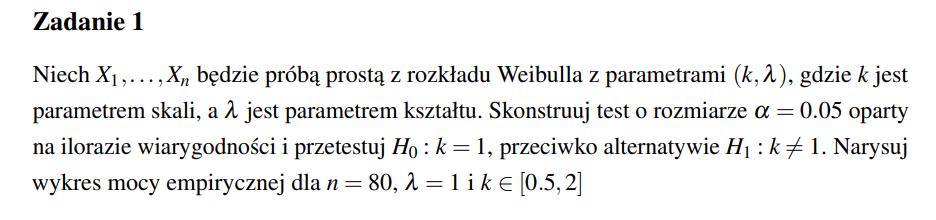



1. **Og√≥lna idea testu ilorazu wiarygodno≈õci**

Z wyk≈Çadu mamy definicjƒô ilorazu wiarygodno≈õci:
$
\lambda(\mathbf{X}) = \frac{\sup_{\theta \in \Theta_0} L(\mathbf{X}, \theta)}{\sup_{\theta \in \Theta} L(\mathbf{X}, \theta)}
$
oraz regu≈Çƒô testu:
$
\varphi(\mathbf{X}) =
\begin{cases}
1, & \text{gdy } \lambda(\mathbf{X}) < c_{\alpha}, \\
0, & \text{gdy } \lambda(\mathbf{X}) \geq c_{\alpha}.
\end{cases}
$
gdzie $ c_{\alpha} $ dobieramy tak, aby spe≈Çniony by≈Ç warunek:
$
\sup_{\theta \in \Theta_0} P_{\theta} (\lambda(\mathbf{X}) > c_{\alpha}) = \alpha. $



W naszym przypadku:
* $ \Theta_0 $ to parametr przestrzeni hipotezy zerowej, czyli rozk≈Çad wyk≈Çadniczy, kt√≥ry jest szczeg√≥lnym przypadkiem Weibulla dla $k=1$
* $ \Theta $ to ca≈Ça przestrze≈Ñ parametryczna Weibulla, tzn. $ k > 0 $.

2. **Funkcje wiarygodno≈õci**

Rozk≈Çad Weibulla dla zmiennej losowej $  X \sim \text{Weibull}(k, \lambda) $ ma funkcjƒô gƒôsto≈õci:
$
f(x | k, \lambda) = \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k}, \quad x > 0.
$
Rozk≈Çad wyk≈Çadniczy to szczeg√≥lny przypadek Weibulla dla $ k = 1 $, czyli:
$
f(x | \lambda) = \frac{1}{\lambda} e^{-x/\lambda}.
$

Dla danej pr√≥bki  $ \mathbf{X} = (X_1, \dots, X_n) $ , funkcjami wiarygodno≈õci sƒÖ:

**F. wiarygodno≈õci dla rozk≈Çadu wyk≈Çadniczego** ($( H_0: k = 1 )$):

$
L(\mathbf{X} | k=1, \lambda) = \prod_{i=1}^{n} \frac{1}{\lambda} e^{-X_i/\lambda}.
$
Estymator najwiƒôkszej wiarygodno≈õci dla $ \lambda $ w rozk≈Çadzie wyk≈Çadniczym to:
$
\hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} X_i.
$
PodstawiajƒÖc to do funkcji wiarygodno≈õci, otrzymujemy:
$
L_{\text{exp}}(\mathbf{X}) = \left( \frac{1}{\bar{X}} \right)^n e^{-n}.
$

**Funkcja wiarygodno≈õci dla rozk≈Çadu Weibulla:**

Estymatory najwiƒôkszej wiarygodno≈õci (MLE) dla Weibulla to:
$
\hat{\lambda} = \left( \frac{1}{n} \sum_{i=1}^{n} X_i^k \right)^{1/k}.
$
PodstawiajƒÖc to do funkcji wiarygodno≈õci, mamy:
$
L_{\text{Weibull}}(\mathbf{X}, k) = \left( \frac{k}{\hat{\lambda}} \right)^n \prod_{i=1}^{n} \left( \frac{X_i}{\hat{\lambda}} \right)^{k - 1} e^{-\sum (X_i / \hat{\lambda})^k}.
$

3. **Iloraz wiarygodno≈õci**

Test ilorazu wiarygodno≈õci por√≥wnuje maksymalne warto≈õci funkcji wiarygodno≈õci w hipotezie zerowej i alternatywnej:
$
LR = -2 \ln \left( \frac{L_{\text{exp}}(\mathbf{X})}{\sup_{k} L_{\text{Weibull}}(\mathbf{X}, k)} \right).
$
Czyli:
$
LR = -2 \ln \left( \frac{\left( \frac{1}{\bar{X}} \right)^n e^{-n}}{\max_k L_{\text{Weibull}}(\mathbf{X}, k)} \right).
$

Z teorii wynika, ≈ºe przy hipotezie zerowej statystyka testowa $ LR $ asymptotycznie ma rozk≈Çad chi-kwadrat z 1 stopniem swobody:
$
LR \sim \chi^2_1.
$
StƒÖd obliczamy warto≈õƒá p:
$
p = P(\chi^2_1 > LR).
$


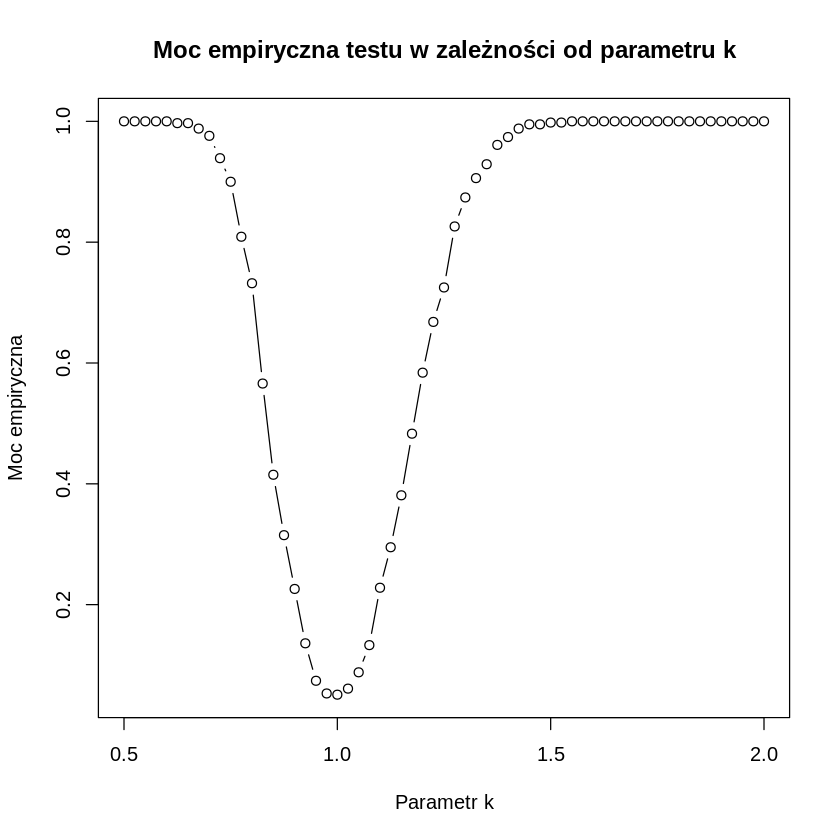

In [ ]:
k_values <- seq(0.5, 2, by = 0.025)
n <- 80
alpha <- 0.05

# Generowania pr√≥by z rozk≈Çadu Weibulla
generate_weibull_sample <- function(k) {
  rweibull(n, shape = k, scale = 1) #przy hipotezie H0: k=1
}

# Funkcja wiarygodno≈õci (dla wyk≈Çadniczego, Weilllbul jest wyk≈Çadnicze dla k=1)
likelihood_exp <- function(data) {
  lambda <- 1/mean(data)
  lambda^n * exp(-lambda * sum(data))
}

# Funkcja wiarygodno≈õci (dla Weibulla)
likelihood_weibull <- function(data, k) {
  lambda_hat <- (sum(data^k) / length(data))^(1/k)
  (k / lambda_hat)^n * prod((data / lambda_hat)^(k - 1)) * exp(-sum((data / lambda_hat)^k))
}


# Test ilorazu wiarygodno≈õci, test asymptotycznie zgodny
lr_test <- function(data) {
  l_exp <- likelihood_exp(data) #wartosc funkcji wiarygodnosci dla danych przy H0
  l_weibull_max <- max(sapply(k_values, function(k) likelihood_weibull(data, k))) #sup f. wiarygodnosci dla danych przy H1
  lr <- -2 * log(l_exp / l_weibull_max) #dla danych przy H0
  p_value <- pchisq(lr, df = 1, lower.tail = FALSE)
  list(lr = lr, p_value = p_value)
}

empirical_power <- numeric(length(k_values))
num_simulations <- 1000

# Symulacja
for (i in 1:length(k_values)) {
  k <- k_values[i]
  rejections <- 0

  for (j in 1:num_simulations) {
    sample <- generate_weibull_sample(k) #generujemy probe z rozkladu Weibulla
    test_result <- lr_test(sample) #nasza statystyka testowa
    if (test_result$p_value < alpha) {
      rejections <- rejections + 1
    }
  }

  empirical_power[i] <- rejections / num_simulations
}

plot(k_values, empirical_power, type = 'b', xlab = 'Parametr k', ylab = 'Moc empiryczna',
     main = 'Moc empiryczna testu w zale≈ºno≈õci od parametru k')

plot(k_values, empirical_power, type = 'b', xlab = 'Parametr k', ylab = 'Moc empiryczna',
     main = 'Moc empiryczna testu w zale≈ºno≈õci od parametru k', xlim = c(0.5, 2))



Wykres pokazuje moc empirycznƒÖ testu w zale≈ºno≈õci od parametru
k.
Krzywa ma wyra≈∫ne minimum w okolicach $k=1$, co oznacza, ≈ºe test ma najmniejszƒÖ moc w≈Ça≈õnie wtedy, gdy dane pochodzƒÖ z rozk≈Çadu wyk≈Çadniczego (kt√≥ry odpowiada
$k=1$ w rozk≈Çadzie Weibulla).

Przy
ùëò
‚Üí
0.5
 lub
ùëò
‚Üí
2
 moc zbli≈ºa siƒô do 1, co sugeruje, ≈ºe test niemal zawsze poprawnie identyfikuje r√≥≈ºnice miƒôdzy rozk≈Çadem Weibulla a wyk≈Çadniczym.

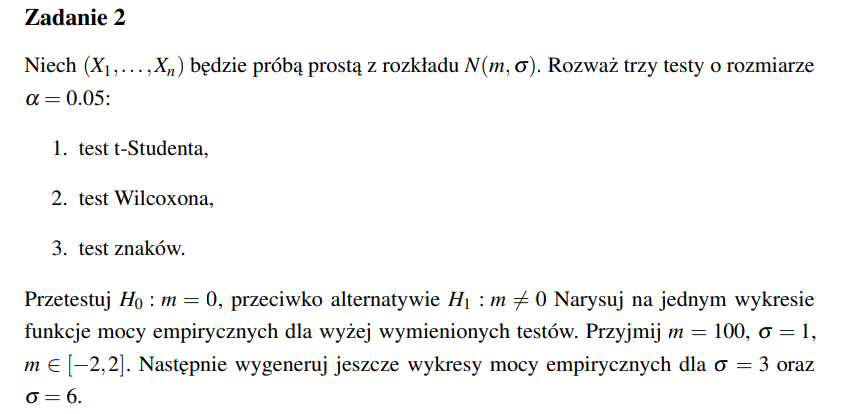

**Test t-studenta - wariant 2**


Wariant ten jest u≈ºywany w kontek≈õcie testowania hipotezy dotyczƒÖcej ≈õredniej populacji ùëö, szczeg√≥lnie gdy chcemy przetestowaƒá, czy ≈õrednia jest r√≥wna pewnej warto≈õci $ùëö_0$. Czyli $ùêª_0:ùëö=ùëö_0$ przy alternatywie $ùêª_1:ùëö‚â†ùëö_0$. Tutaj r√≥wnie≈º przyjmujemy za≈Ço≈ºenie, ≈ºe dane pochodzƒÖ z rozk≈Çadu normalnego o nieznanych parametrach.


Statystyka testowa:
$$T(X) = \frac{\sqrt{n} \sum_{j=1}^n (X_j - m_0)}{\sqrt{\frac{1}{n-1} \sum_{j=1}^n (X_j - \bar{X})^2}}$$

p warto≈õƒá:
$$
p(X) = 2 \left( 1 - F_{t_{n-1}} \left( \frac{\sqrt{n} \left| \sum_{j=1}^n (X_j - m_0)\right| }{\sqrt{\frac{1}{n-1} \sum_{j=1}^n (X_j - \bar{X})^2}} \right) \right) = 2 \left( 1 - F_{t_{n-1}} |T| \right) $$


**Test Wilcoxona**


Jest to nieparametryczna wersja testu t-Studenta dla wariantu 1 i 2.

Przypomnijmy, ≈ºe dla testu t-Studenta mieli≈õmy $ ùëã_1,‚Ä¶,ùëã_ùëõ‚àºùëÅ(ùëö,ùúé2)$. W wariancie 1 testowali≈õmy $ùêª_0:ùëö‚â§ùëö_0 $, przeciwko $ùêª_1:ùëö>ùëö_0 $. Dla wariantu 2 natomiast $ùêª_0:ùëö=ùëö_0$, przeciwko $ùêª_1:ùëö‚â†ùëö_0 $.

Teraz mamy $ ùëã_1,‚Ä¶,ùëã_ùëõ $ pr√≥bƒô prostƒÖ o dystrybuancie$ ùêπ_ùëã(ùë°)=ùêπ(ùë°)-Œî(ùë°) $, gdzie:

ùêπ jest nieznanƒÖ, ciƒÖg≈ÇƒÖ dystrybuantƒÖ, symetrycznƒÖ wok√≥≈Ç 0,
$Œî$ jest funkcjƒÖ sta≈Çego znaku.

BƒôdƒÖ nas interesowaƒá dwa warianty:

$ ùêª_0:Œî‚â§0, \text{przeciwko }  ùêª_1:Œî>0, $

$ ùêª_0:Œî‚â§0,  \text{przeciwko } ùêª_1:Œî>0,$

Niech $(|ùëÖ_1|,‚Ä¶,|ùëÖ_ùëõ|) $bƒôdzie wektorem rang dla $(|ùëã_1|,‚Ä¶,|ùëã_ùëõ|)$.

Oznaczmy r√≥wnie≈º:
$ùëÖ¬Ø|ùëã_+|= \frac{1}{n} ‚àë_{n}^ùëñ=|ùëÖ_ùëñ|ùïÄ(ùëã_ùëñ>0) $ oraz $ùëÖ¬Ø|ùëã_‚àí|=\frac{1}{n}‚àë|_{n}^ùëñ=|ùëÖ_ùëñ|ùïÄ(ùëã_ùëñ<0)$

$
\text{Test Wilcoxona odrzuci:}$

$	‚Ä¢
H_0 : \Delta \leq 0, \quad \text{gdy } \overline{R}\lvert X^+ \rvert - \overline{R}\lvert X^- \rvert \text{ bƒôdzie du≈ºe,} $

$	‚Ä¢
H_0 : \Delta = 0, \quad \text{gdy } \left| \overline{R}\lvert X^+ \rvert - \overline{R}\lvert X^- \rvert \right| \text{ bƒôdzie du≈ºe.} $

$ \text{Zestandaryzowana statystyka testowa Wilcoxona przy prawdziwo≈õci hipotezy zerowej:}$

$$
W = \frac{\overline{R}|X^+| - \overline{R}|X^-|}{\sqrt{V_{\Delta = 0}\left(\overline{R}|X^+| - \overline{R}|X^-|\right)}} = \frac{\overline{R}|X^+| - \frac{n+1}{4}}{\sqrt{\frac{(n+1)(2n+1)}{24n}}} \xrightarrow{n \to \infty} \mathcal{N}(0, 1).$$

$\text{P-warto≈õƒá:} $

$$
p(W) = 2 \left( 1 - F_{\mathcal{N}(0,1)}(|W|) \right)
$$

**TEST ZNAK√ìW**

1. $H_0 : x_p \leq m$, przeciwko $H_1 : x_p > m$,  
2. $H_0 : x_p = m$, przeciwko $H_1 : x_p \neq m$.

Warto≈õƒá $m$ jest znana i ustalona. Wobec tego, mo≈ºemy rozwa≈ºyƒá przesuniƒôte dane:

$ \mathbf{Z} = (Z_1, Z_2, \ldots, Z_n) = (X_1 - m, X_2 - m, \ldots, X_n - m). $

Wtedy $z_p$ bƒôdzie oznaczaƒá kwantyl rzƒôdu $p$ dla pr√≥by $\mathbf{Z}$. W√≥wczas problem testowania sprowadza siƒô do:

1. $H_0 : z_p \leq 0$, przeciwko $H_1 : z_p > 0$,  
2. $H_0 : z_p = 0$, przeciwko $H_1 : z_p \neq 0$.

Na wyk≈Çadzie pokazano, ≈ºe odzworowania:

$ \text{Rang}_+ (|Z_1|, \ldots, |Z_n|) = (r_1 \mathbb{I}(Z_1 > 0), \ldots, r_n \mathbb{I}(Z_n > 0)), $  
$ \text{Rang}_- (|Z_1|, \ldots, |Z_n|) = (r_1 \mathbb{I}(Z_1 < 0), \ldots, r_n \mathbb{I}(Z_n < 0)) $  

sƒÖ maksymalnym niezmiennikiem wzglƒôdem grupy przekszta≈Çce≈Ñ:

$ G = \{g : \mathbb{R}^n \to \mathbb{R}^n : g(x) = (h(X_1), \ldots, h(X_n)), \, h - \text{ciƒÖg≈Ça, ≈õci≈õle rosnƒÖca i nieparzysta} \}. $

Oznaczmy odpowiednio frakcjƒô dodatnich i ujemnych obserwacji:

$ P_+ = \frac{1}{n} \sum_{i=1}^n \mathbb{I}(Z_i > 0) $ oraz $ P_- = \frac{1}{n} \sum_{i=1}^n \mathbb{I}(Z_i < 0). $

Test znak√≥w odrzuci:
1. $H_0 : z_p \leq 0$, gdy $P_+ - P_-$ jest du≈ºe,  
2. $H_0 : z_p = 0$, gdy $|P_+ - P_-|$ jest du≈ºe.

Statystyka testowa to zstandaryzowana r√≥≈ºnica $P_+ - P_-$, przy prawdziwo≈õci hipotezy zerowej ma nastƒôpujƒÖcy rozk≈Çad:

$ S = \sqrt{n} \frac{P_+ - P_- - (1 - p)}{\sqrt{p(1 - p)}} \overset{d}{\to} N(0, 1). $

Zatem:
1. Dla testu $H_0 : z_p \leq 0$, przeciwko $H_1 : z_p > 0$, mamy $\phi(S) = 1$ dla $S > c_\alpha$, gdzie $c_\alpha = F_{N(0, 1)}^{-1}(1 - \alpha)$. Asymptotyczna p-warto≈õƒá wynosi $p(S) = 1 - F_{N(0, 1)}(S).$
2. Dla testu $H_0 : z_p = 0$, przeciwko $H_1 : z_p \neq 0$, mamy $\phi(S) = 1$ dla $|S| > c_\alpha$, gdzie $c_\alpha = F_{N(0, 1)}^{-1}(1 - \alpha/2)$. Asymptotyczna p-warto≈õƒá wynosi $p(S) = 2 \cdot (1 - F_{N(0, 1)}(|S|)).$

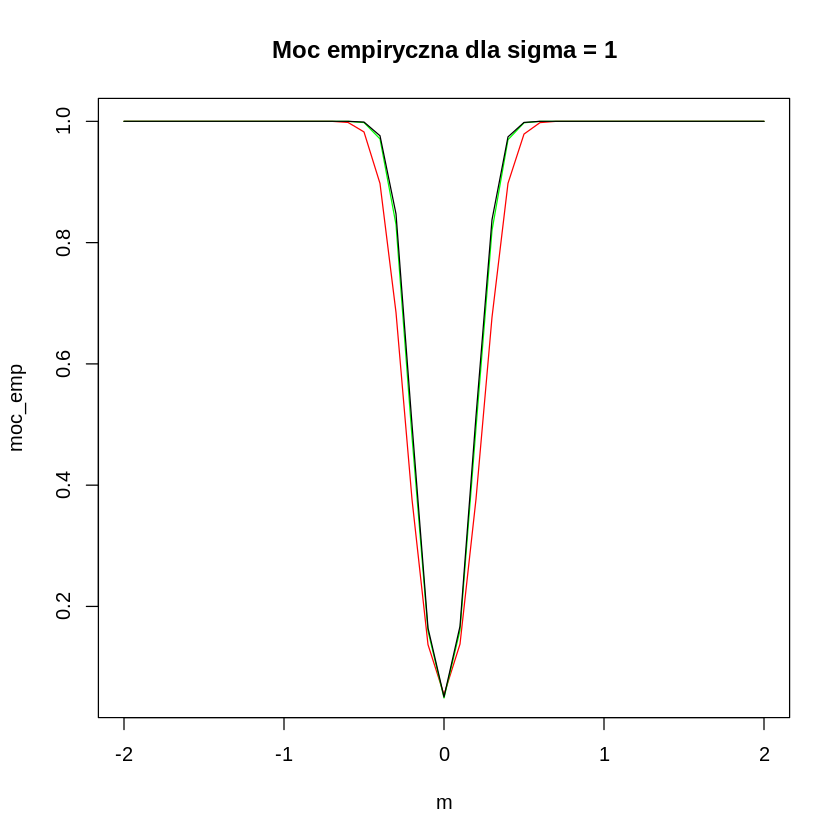

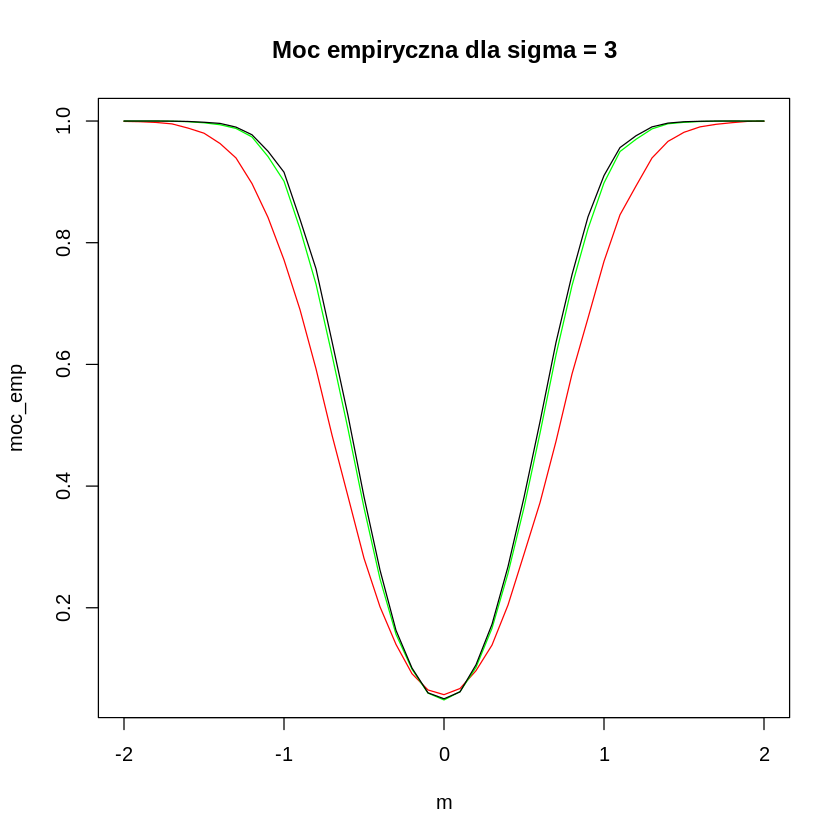

[1] 0.04961324


	Wilcoxon signed rank test with continuity correction

data:  Z
V = 3096, p-value = 0.04981
alternative hypothesis: true location is not equal to 0


[1] 0.07186064


	Exact binomial test

data:  sum(Z > 0) and n
number of successes = 59, number of trials = 100, p-value = 0.08863
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4871442 0.6873800
sample estimates:
probability of success 
                  0.59 


[1] 0.07525554


	One Sample t-test

data:  Z
t = 1.7978, df = 99, p-value = 0.07526
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.1145195  2.3234835
sample estimates:
mean of x 
 1.104482 


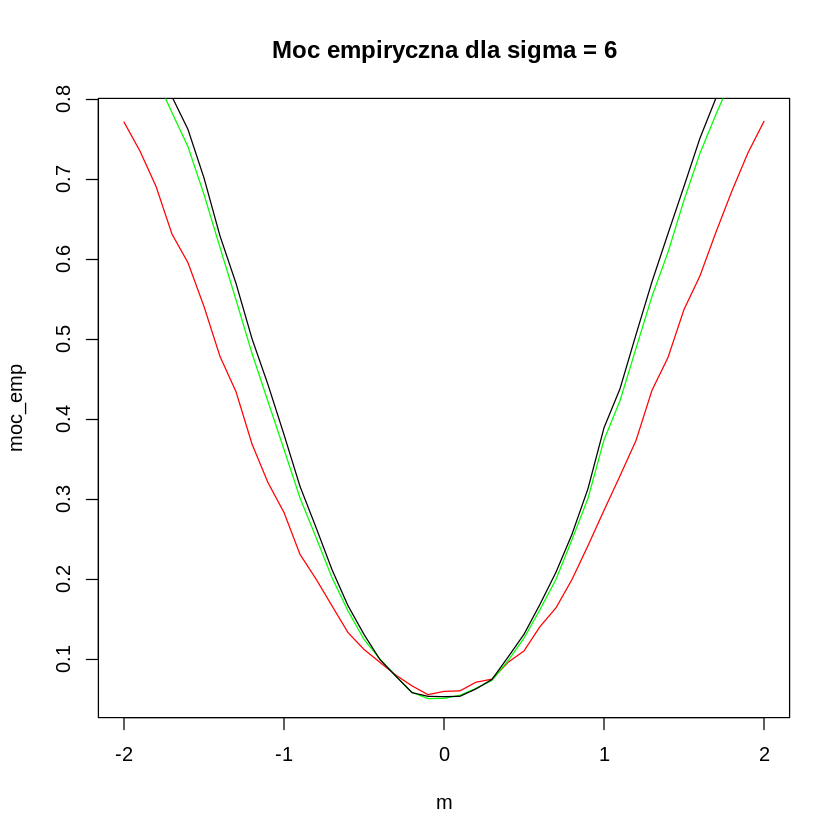

In [ ]:
set.seed(123)
m = seq(-2,2, by=0.1) # z przedzia≈Çu [-2,2]
mc =10000
n=100
rz = 0.5 #kwantyl
K = 0
alpha = 0.05
s = c(1, 3, 6)
for (sigma in s) {
  moc_emp =numeric(length(m))    # Moc testu znak√≥w
  moc_emp_w = numeric(length(m)) # Moc testu Wilcoxona
  moc_emp_tstud2=numeric(length(m)) # Moc testu t-studenta (wariant 2)

  for (i in 1 : length(m)){
    licznik = 0
    licznik_w=0
    licznik_tstud2 =0
    for (j in 1 : mc){
      Z = rnorm(n,m[i],sigma)
      Z = (Z-K)
      M = sum(Z > 0) / n
      R = rank(abs(Z),ties.method = "random")
      Mw = sum(R[Z > 0])
      S = sqrt(n)*(M-(1-rz))/sqrt(rz*(1-rz))
      Mw=Mw/n
      W = (Mw-(n+1)/4)/sqrt((n+1)*(2*n+1)/(24*n))
      Ts = sqrt(1/n)*(sum(Z))/sqrt(sum((Z-mean(Z))^2)/(n-1))
      p_w_t = 2*(1-pt(abs(Ts),n-1))
      p = 2 * (1-pnorm(abs(S),0,1))
      pw = 2*(1-pnorm(abs(W),0,1))
      if (p < alpha){
        licznik = licznik + 1
      }
      if (pw < alpha){
        licznik_w = licznik_w + 1
      }
      if(p_w_t< alpha){
        licznik_tstud2 = licznik_tstud2+1
      }
    }
    moc_emp[i] = licznik / mc
    moc_emp_w[i] = licznik_w / mc
    moc_emp_tstud2[i]=licznik_tstud2/mc

    moc_emp
    moc_emp_w
    moc_emp_tstud2
  }
  plot(m,moc_emp, type='l', col='red',main = paste("Moc empiryczna dla sigma =", sigma))
  lines(m,moc_emp_w, type='l', col='green')
  lines(m,moc_emp_tstud2, type='l', col='black')
}

pw
wilcox.test(Z, alternative = "two.sided")
p
binom.test(sum(Z > 0), n, p=0.5, alternative = "two.sided" )
p_w_t
t.test(Z,mu= 0, alternative = "two.side")

1. **Analiza wykres√≥w mocy empirycznej**

Na wykresach przedstawiona jest moc empiryczna trzech test√≥w

(kolory linii):
*   Czerwona - test znak√≥w (binominalny)
*   Zielona - test Wilcoxona
*   Czarna - test t-Studenta


Moc empiryczna opisuje prawdopodobie≈Ñstwo odrzucenia hipotezy zerowej w zale≈ºno≈õci od warto≈õci parametru  m .

Interpretacja wykres√≥w dla r√≥≈ºnych warto≈õci sigma:

  1.	Sigma = 6 (pierwszy wykres)

*   Moc testu dla r√≥≈ºnych warto≈õci  m  jest relatywnie niska.
*   Najmniejsza moc jest dla $ m \approx 0 $ (gdzie testy majƒÖ trudno≈õƒá z wykryciem r√≥≈ºnicy).
*   Dla wiƒôkszych warto≈õci  |m| , moc ro≈õnie, ale nie osiƒÖga 100%.
*   R√≥≈ºnice miƒôdzy testami sƒÖ wyra≈∫ne ‚Äì test t-Studenta (czarna linia) wydaje siƒô najskuteczniejszy.

2.	Sigma = 3 (drugi wykres)

*   Og√≥lnie wiƒôksza moc testu ni≈º dla  $\sigma = 6$ .
*   Testy osiƒÖgajƒÖ blisko 100% mocy dla wiƒôkszych warto≈õci  $|m|$ .
*   Test Wilcoxona (zielona linia) oraz test t-Studenta (czarna linia) sƒÖ bardzo podobne.

3.	Sigma = 1 (trzeci wykres)

*   Moc testu jest niemal natychmiastowa dla warto≈õci $ |m| > 0.5$.
*  Testy osiƒÖgajƒÖ prawie 100% mocy bardzo szybko.
*   Wszystkie trzy testy zachowujƒÖ siƒô podobnie.


Wniosek:
Im mniejsza wariancja  $\sigma $, tym ≈Çatwiej testy wykrywajƒÖ r√≥≈ºnicƒô miƒôdzy hipotezƒÖ zerowƒÖ a alternatywnƒÖ. Gdy $ \sigma = 6 $, testy majƒÖ trudno≈õci w wykryciu r√≥≈ºnic (sƒÖ mniej czu≈Çe). Natomiast dla $ \sigma = 1 $, testy dzia≈ÇajƒÖ niemal perfekcyjnie.

**P warto≈õci:**

 Test Wilcoxona : 0.049613243261301 $<$ 0.05 ale granicznie (odrzucamy hipoteze zerowowƒÖ: m=0)

Test znak√≥w: 0.0718606382258518 $>$ 0.05 nie mamy podstaw do odrzucenia hipotezy zerowej.

Test t-studenta: 0.075255536795682 $>$ 0.05 nie mamy podstaw do odrzucenia hipotezy zerowej.

Wyniki wszystkich test√≥w,stworzonych przez nas, pokrywajƒÖ siƒô z wynikami test√≥w wprowadzonych w pakietach R.